# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-cpu opencv-python matplotlib

In [2]:
!pip list

Package                      Version
---------------------------- --------
absl-py                      2.1.0
anyio                        4.2.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.11.0
beautifulsoup4               4.12.2
bleach                       4.1.0
Brotli                       1.0.9
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           2.0.4
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
executing                    0.8.3
fastjsonschema               2.16.2
filetype                     1.2.0
flatbuffers                  24.3.25
fo

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
gpus

[]

# 2. Remove dodgy images

In [7]:
pip install filetype

Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2
import filetype

In [9]:
data_dir = 'data' 

In [10]:
os.listdir(data_dir)

['fake', 'real']

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
img = cv2.imread(os.path.join('data','real','real_00001.jpg'))

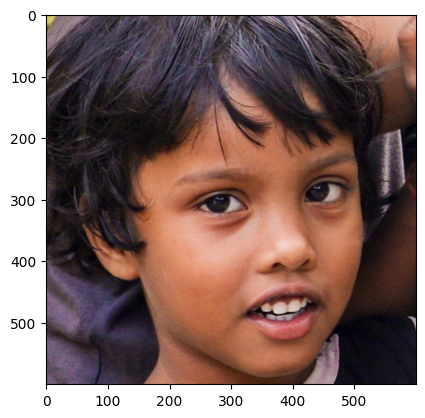

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGRA2RGB))

In [15]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = filetype.extension(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

Issue with image data\fake\easy_100_1111.jpg
Issue with image data\fake\easy_101_0010.jpg
Issue with image data\fake\easy_102_0101.jpg
Issue with image data\fake\easy_103_1111.jpg
Issue with image data\fake\easy_104_1000.jpg
Issue with image data\fake\easy_105_1100.jpg
Issue with image data\fake\easy_106_0011.jpg
Issue with image data\fake\easy_107_1011.jpg
Issue with image data\fake\easy_108_1111.jpg
Issue with image data\fake\easy_109_1111.jpg
Issue with image data\fake\easy_10_0001.jpg
Issue with image data\fake\easy_110_0001.jpg
Issue with image data\fake\easy_111_1101.jpg
Issue with image data\fake\easy_112_1001.jpg
Issue with image data\fake\easy_113_0011.jpg
Issue with image data\fake\easy_114_1110.jpg
Issue with image data\fake\easy_115_0010.jpg
Issue with image data\fake\easy_116_111.jpg
Issue with image data\fake\easy_117_0101.jpg
Issue with image data\fake\easy_118_1111.jpg
Issue with image data\fake\easy_119_0011.jpg
Issue with image data\fake\easy_11_1111.jpg
Issue with im

# 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2041 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

In [19]:
len(batch)

2

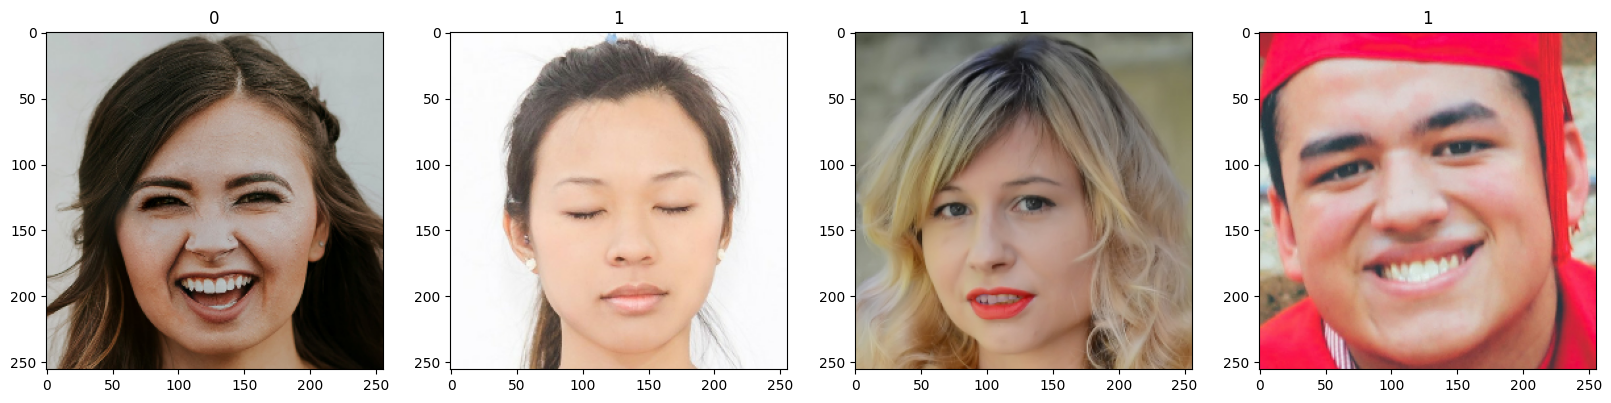

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
scaled_iterator = data.as_numpy_iterator()

In [23]:
batch = scaled_iterator.next()

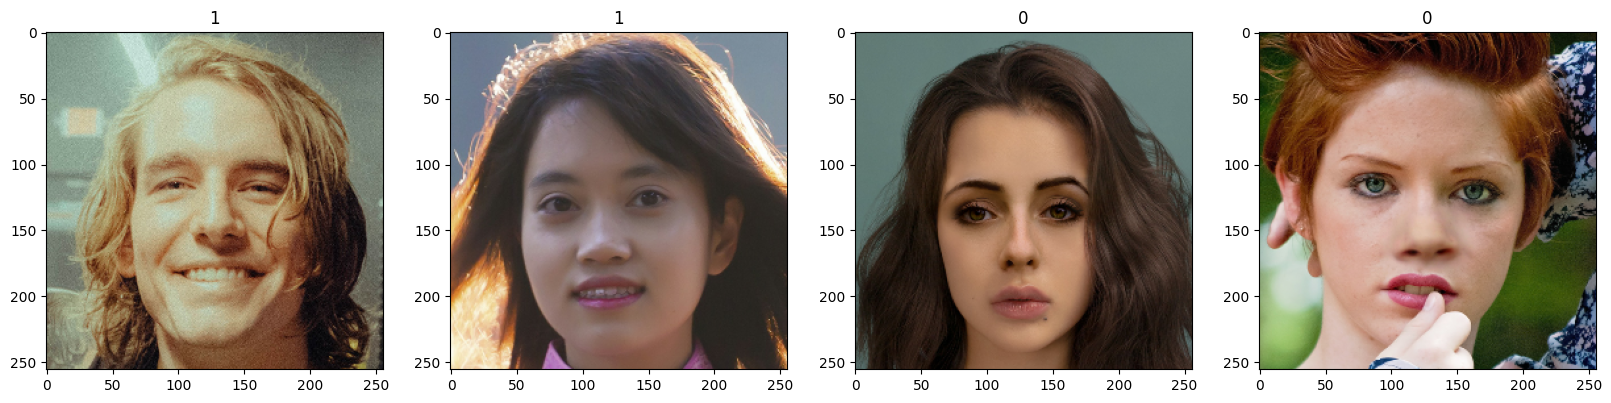

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [25]:
len(data)

64

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [27]:
train_size

44

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [39]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 594.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
from keras.utils import plot_model

In [43]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [45]:
model = Sequential()

In [46]:

# First Convolutional Block
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fourth Convolutional Block
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 17,202,369 (65.62 MB)

 Trainable params: 17,200,641 (65.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

# 7. Train

In [55]:
logdir='logs'

In [56]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [57]:
hist = model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7629 - loss: 0.5076 - val_accuracy: 0.6823 - val_loss: 0.6151
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7809 - loss: 0.4733 - val_accuracy: 0.6328 - val_loss: 0.7060
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.8051 - loss: 0.4336 - val_accuracy: 0.6823 - val_loss: 0.6219
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.8116 - loss: 0.4271 - val_accuracy: 0.6328 - val_loss: 0.6767
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.8121 - loss: 0.4300 - val_accuracy: 0.6745 - val_loss: 0.6615
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.8154 - loss: 0.4097 - val_accuracy: 0.6380 - val_loss: 0.7103
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.8241 - loss: 0.3888 - val_accuracy: 0.7083 - val_loss: 0.6248
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.8190 - loss: 0.4006 - val_accuracy: 0.

# 8. Plot Performance

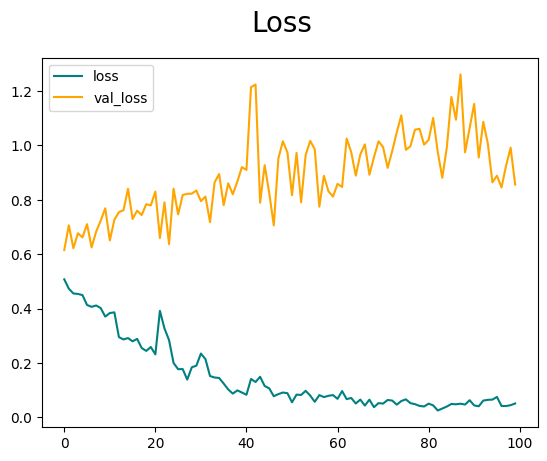

In [58]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

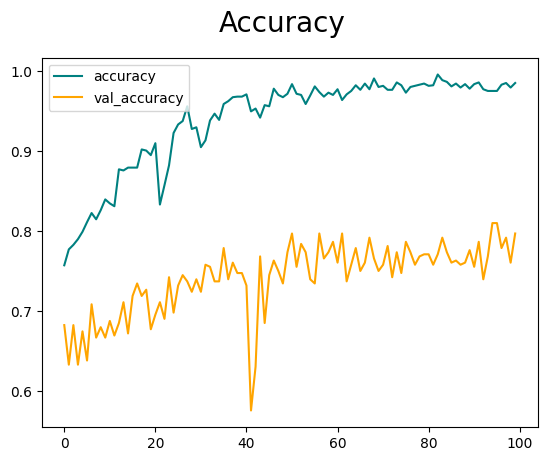

In [59]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [60]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [61]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


In [63]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.6698113083839417, Recall:0.7319587469100952, Accuracy:0.6822916865348816


In [64]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.6698113, shape=(), dtype=float32) tf.Tensor(0.73195875, shape=(), dtype=float32) tf.Tensor(0.6822917, shape=(), dtype=float32)


# 10. Test

In [65]:
import cv2

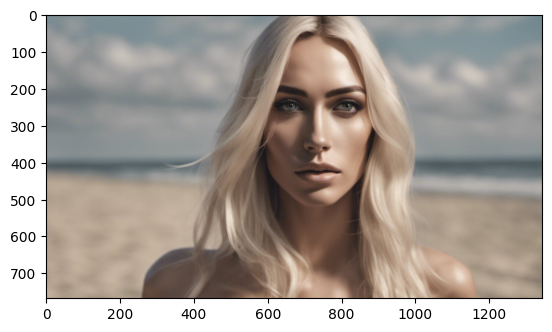

In [66]:
img = cv2.imread('faketest.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

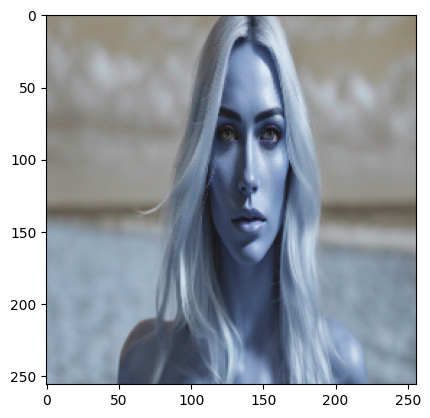

In [67]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


In [69]:
yhat

array([[0.65337694]], dtype=float32)

In [70]:
if yhat > 0.5: 
    print(f'Predicted class is Fake')
else:
    print(f'Predicted class is Real')

Predicted class is Fake


# 11. Save the Model

In [184]:
from tensorflow.keras.models import load_model

In [185]:
model.save(os.path.join('models','RealAndFakeImage.h5'))

In [186]:
new_model = load_model(os.path.join('models','RealAndFakeImage.h5'))

In [187]:
new_model

<Sequential name=sequential_2, built=True>

In [188]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [189]:
if yhatnew > 0.5: 
    print(f'Predicted class is Fake')
else:
    print(f'Predicted class is Real')

Predicted class is Fake
